In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.spatial import distance

import csv

# Read data for X and y
X = pd.read_csv("data\X.csv").values
y = pd.read_csv("data\y.csv").values

# Flatten list y
y = [item for sublist in y for item in sublist]

In [2]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
sm = SMOTE(k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

#oversampler = RandomOverSampler(random_state=42)
#X_res, y_res = oversampler.fit_resample(X,y)

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

# Define the scoring metric
scorer = make_scorer(f1_score)

model = KNeighborsClassifier()

grid_space={'n_neighbors':[5,7,9,11,13,15],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidean','manhattan']
            }

grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring="f1_micro",verbose=10)

model_grid = grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 1/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.634 total time=   0.6s
[CV 2/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 2/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.637 total time=   0.5s
[CV 3/3; 1/36] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 3/3; 1/36] END metric=minkowski, n_neighbors=5, weights=uniform;, score=0.632 total time=   0.5s
[CV 1/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 1/3; 2/36] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.678 total time=   0.5s
[CV 2/3; 2/36] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 2/3; 2/36] END metric=minkowski, n_neighbors=5, weights=distance;, score=0.675 total time=   0.6s
[CV 3/3; 2/36] START metri

In [5]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score is: 0.7121065573103976


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [1]:
y_pred = knn.predict(X_test)
print(y_pred[0])

NameError: name 'knn' is not defined

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           7       0.49      0.53      0.51       287
          15       0.65      0.76      0.70       268
          16       0.74      0.93      0.82       266
          21       0.69      0.86      0.77       270
          33       0.46      0.30      0.36       264
          34       0.97      1.00      0.99       276
          39       0.81      0.97      0.89       244
          56       0.58      0.45      0.51       252
          68       0.51      0.26      0.35       246
          95       0.72      0.84      0.78       266
        1000       0.71      0.60      0.65       245
        1001       0.39      0.40      0.39       268

    accuracy                           0.66      3152
   macro avg       0.64      0.66      0.64      3152
weighted avg       0.64      0.66      0.64      3152



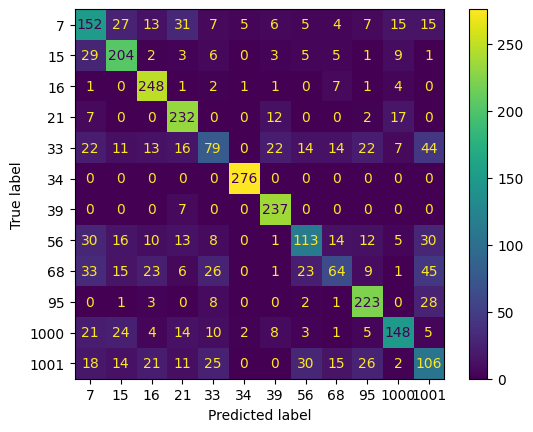

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()